# **1. Preprocessing and Tokenizing**

## **1.1. 전처리(Preprocessing)**

### 1.1.1 코퍼스 수집하기

- 데이터를 직접 생성하는 방법
- 유료 데이터를 구매하는 방법
- 공개 데이터를 다운로드하여 활용하는 방법
- 웹 크롤링 등을 이용하여 수집하는 방법
  - 웹 크롤링의 경우 잘못 사용하면 법적인 문제가 발생할 수 있음
  - 웹 사이트의 크롤링 허용 여부는 사이트의 robots.txt에서 확인 가능함

In [ ]:
!wget https://www.ted.com/robots.txt

--2022-10-06 12:36:33--  https://www.ted.com/robots.txt
Resolving www.ted.com (www.ted.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to www.ted.com (www.ted.com)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394 [text/plain]
Saving to: ‘robots.txt’

robots.txt          100%[===================>]     394  --.-KB/s    in 0s      

2022-10-06 12:36:33 (16.4 MB/s) - ‘robots.txt’ saved [394/394]



In [ ]:
!cat robots.txt

User-agent: *
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /conversations
Disallow: /themes/rss
Disallow: /discussions
Disallow: /tpv4

User-agent: Baiduspider
Disallow: /search
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /discussions
Disallow: /tpv4


- TED 사이트에서 크롤링이 허용되지 않는 경우를 저장해 놓았음
---

- 간단한 크롤링을 해 보자
  - urllib.request : 표준 파이썬 라이브러리
    - 웹을 통해 데이터를 요청하는 함수, 쿠키 처리, 메타데이터 조작 등의 함수를 가지고 있음
  - BeautifulSoup : bs4라고도 함
    - 잘못된 HTML 수정 등의 기능을 가지며, HTML을 쉽게 탐색할 수 있는 XML형식의 파이썬 객체로 변환. 웹 탐색에 유용함
    - Colab에는 기본적으로 BeautifulSoup가 설치되어 있음

In [ ]:
from urllib.request import urlopen

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
html = urlopen("http://naver.com/")
bsObj = BeautifulSoup(html, "html.parser")


<!DOCTYPE doctype html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="tw
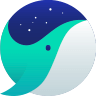
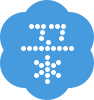

In [ ]:
bsObj

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

url_tmpl = 'https://finance.naver.com/item/main.nhn?code=%s'
url = url_tmpl % ('005930')

item_info = requests.get(url).text
soup = BeautifulSoup(item_info, 'html.parser')
finance_info = soup.select('div.section.cop_analysis div.sub_section')[0]

th_data = [item.get_text().strip() for item in finance_info.select('thead th')]
annual_date = th_data[3:7]
quarter_date = th_data[7:13]

finance_index = [item.get_text().strip() for item in finance_info.select('th.h_th2')][3:]

finance_data = [item.get_text().strip() for item in finance_info.select('td')]
finance_data = np.array(finance_data)
finance_data.resize(len(finance_index), 10)

finance_date = annual_date + quarter_date

finance = pd.DataFrame(data=finance_data[0:,0:], index=finance_index, columns=finance_date)
finance

,2019.12,2020.12,2021.12,2022.12(E),2021.06,2021.09,2021.12,2022.03,2022.06,2022.09(E)
매출액,"2,304,009","2,368,070","2,796,048","3,118,540","636,716","739,792","765,655","777,815","772,036","783,586"
영업이익,"277,685","359,939","516,339","500,844","125,667","158,175","138,667","141,214","140,970","118,738"
당기순이익,"217,389","264,078","399,074","393,650","96,345","122,933","108,379","113,246","110,988","90,775"
영업이익률,12.05,15.20,18.47,16.06,19.74,21.38,18.11,18.15,18.26,15.15
순이익률,9.44,11.15,14.27,12.62,15.13,16.62,14.16,14.56,14.38,11.58
ROE(지배주주),8.69,9.98,13.92,12.39,12.04,12.60,13.92,15.13,15.10,
부채비율,34.12,37.07,39.92,,36.29,38.30,39.92,39.34,36.64,
당좌비율,233.57,214.82,196.75,,214.08,210.70,196.75,202.26,219.39,
유보율,"28,856.02","30,692.79","33,143.62",,"31,140.36","32,225.78","33,143.62","34,110.56","35,054.68",
EPS(원),"3,166","3,841","5,777","5,709","1,391","1,775","1,567","1,638","1,613","1,332"


In [ ]:
item_info

'\n\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\t<title>삼성전자 : 네이버 금융</title>\n\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n<meta name="apple-mobile-web-app-title" content="네이버 금융" />\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="https://finance.naver.com/item/main.naver?code=005930"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="삼성전자 - 네이버 금융 : 네이버 금융"/>\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳"/>\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t    \n\t\t    \n\t\t\n    \n\n<meta property="og:type" content="article"/>\n<meta property="og:article:thumbnailUrl" con

### 1.1.2 정규 표현식 사용하기
- 참고사이트
  - http://pythonstudy.xyz/python/article/401-정규-표현식-Regex

In [1]:
# Regex를 위한 모듈 임포트
import re

# 정규 표현식 지정
regex1 = r"([\w]+\s*:? \s*)?\(?\+?([0-9]{1,3})?\-?[0-9]{2,3}(\)|\-)?[0-9]{3,4}\-?[0-9]{4}"

In [2]:
x1 = "Seokhwan: +82-10-1234-5678"
print(re.sub(regex1, "REMOVED", x1))      # 해당 정규 표현식을 만족하는 경우 "REMOVED"로 치환

REMOVED


In [ ]:
x2 = "Seok hwan: 010-1234-5678"           # 앞의 "Seok공백"은 해당 정규 표현식을 만족하지 않고 hwan부터 이후까지는 만족함
print(re.sub(regex1, "REMOVED", x2))

Seok REMOVED


In [ ]:
x2 = "Seok hwan: 010-1234-5678 KOREA"     # "공백KOREA" 부분도 해당 정규 표현식을 만족하지 않음
print(re.sub(regex1, "REMOVED", x2))

Seok REMOVED KOREA


In [4]:
# 단순히 숫자, -의 배열만으로 구성된 정규 표현식 지정
regex2 = r"[0-9]{3}-[0-9]{4}-[0-9]{4}"

In [5]:
x2 = "Seokhwan: 010-1234-5678"
print(re.sub(regex2, "***-****-****", x2))

Seokhwan: ***-****-****


In [ ]:
x2 = "010-1234-5678 : Seokhwan"
print(re.sub(regex2, "***-****-****", x2))

***-****-**** : Seokhwan


In [ ]:
text = "문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다."
 
regex = re.compile(r'(\d{3})-(\d{3}-\d{4})')
matchobj = regex.search(text)
areaCode = matchobj.group(1)
num = matchobj.group(2)
fullNum = matchobj.group()
print(areaCode, num) # 032 232-3245

032 232-3245


In [ ]:
print(matchobj.group(1))

032


In [ ]:
# 인덱싱 대신 그룹 명을 지정하여 사용할 수도 있음(Named Capturing Group)
# Named Capturing Group을 사용하는 방법은 (?P<그룹명>정규식) 와 같이 정규식 표현 앞에 ?P<그룹명>을 사용함
# 이후 MatchObject에서 group('그룹명') 을 호출하면 캡쳐된 그룹 값을 얻을 수 있음

regex = re.compile(r'(?P<area>\d{3})-(?P<num>\d{3}-\d{4})')
matchobj = regex.search(text)
areaCode = matchobj.group("area")
num = matchobj.group("num")
print(areaCode, num)  # 032 232-3245

032 232-3245


### 1.1.3 문장 단위 분절

- NLTK (Natural Language Toolkit)을 사용해 보자
  - Punkt Sentence Tokenizer 모듈
    - sent_tokenize(): 파이썬에서 문자열로 인식하는 텍스트는 무엇이든지 받아서 문장 별로 토큰화 할 수 있다.
    - word_tokenize(): 파이썬에서 문자열로 인식하는 텍스트는 무엇이든지 받아서 단어 별로 토큰화 할 수 있다.

In [6]:
import nltk

# NLTK의 Punkt sentence tokenizer 모듈 다운로드
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- 문장 단위 분절
  - NLTK를 간단히 이용해서 문장 단위로 나눠보자.

In [7]:
# import nltk

text = "The Matrix is everywhere its all around us, here even in this room. You can see it out your window or on your television. You feel it when you go to work, or go to church or pay your taxes."
tokens = nltk.sent_tokenize(text)
print(tokens)

['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [8]:
text = "자연어 처리는 인공지능의 한 줄기 입니다. 시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어 처리는 새로운 전기를 맞이하게 되었습니다. 문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것입니다."
tokens = nltk.sent_tokenize(text)
print(tokens)

['자연어 처리는 인공지능의 한 줄기 입니다.', '시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어 처리는 새로운 전기를 맞이하게 되었습니다.', '문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것입니다.']


- 파일을 읽어들여서 나눠보자.

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/20221012_NLP/data/'

In [ ]:
import nltk

# NLTK의 Punkt sentence tokenizer 모듈 다운로드
# punkt: 기본적인 문장 분절을 위한 사전학습을 수행한 라이브러리
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- 한 라인에 여러 문장이 들어있는 경우

In [ ]:
import re
from nltk.tokenize import sent_tokenize

file_path = ROOT_PATH + "input_ko1.txt"
file = open(file_path, "r")

file_text = file.read()
file_text

'시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다. 이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다. 문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다. 또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다. 자연어처리는 인공지능의 한 줄기 입니다.'

In [ ]:
sentences = sent_tokenize(file_text)
print(sentences)

['시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.', '이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다.', '문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.', '또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.', '자연어처리는 인공지능의 한 줄기 입니다.']


In [ ]:
if file_text.strip() != "":
  line = re.sub(r'([a-z])\.([A-Z])', r'\1. \2', file_text.strip())
  sentences = sent_tokenize(line)

  for s in sentences:
    if s != "":
      print(s)

시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.
이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다.
문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.
또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.
자연어처리는 인공지능의 한 줄기 입니다.


In [ ]:
# 정규화 과정을 통해서 정리하지 않아도 잘 동작함 : NLTK.sent_tokenize()에 이미 내장된 상태

- 문장 합치기 및 분절: 여러 라인에 걸쳐 한 문장이 들어있는 경우

In [ ]:
file_path = ROOT_PATH + "input_ko2.txt"
file = open(file_path, "r")

file_text = file.read()
file_text

'자연어처리는 인공지능의 한 줄기 입니다. 시퀀스 투 시퀀스의 등장 이후로 \n딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다. 문장을 \n받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 \n있게 된 것 입니다. 이에 따라 이전까지 큰 변화가 없었던 자연어처리 분야\n의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 \n의해 정복 당하였습니다. 또한 attention 기법의 고도화로 전이학습이 발전\n하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.'

In [ ]:
buf = []

text = file_text.split("\n")

for line in text:
  if line.strip() != "":
    buf += [line.strip()]
    sentences = sent_tokenize(" ".join(buf))

    if len(sentences) > 1:
      buf = sentences[1:]
      print(sentences[0])

자연어처리는 인공지능의 한 줄기 입니다.
시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.
문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.
이에 따라 이전까지 큰 변화가 없었던 자연어처리 분야 의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다.


In [ ]:
# 그런데 그냥 이렇게 해결해도 문제 없음
text = file_text.replace("\n", "")
sentences = sent_tokenize(text)
sentences

['자연어처리는 인공지능의 한 줄기 입니다.',
 '시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.',
 '문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.',
 '이에 따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다.',
 '또한 attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.']

### 1.1.4 분절

In [11]:
!pip install nltk==3.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392154 sha256=f960e3b3904c92300a6555d67733f46627d4d167d771fcb4d9782a6a43543741
  Stored in directory: /root/.cache/pip/wheels/60/de/57/6bced01d340818a36413222e6efcc7766d1f1e4575782b6223
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/20221012_NLP/data/'

In [3]:
import nltk
nltk.download('punkt')
nltk.download('perluniprops')
from nltk.tokenize.moses import MosesTokenizer
nltk.download('nonbreaking_prefixes')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.


True

In [4]:
t = MosesTokenizer()

In [5]:
file_path = file_path = ROOT_PATH + "input_en.txt"
file = open(file_path, "r")

file_text = file.read()
file_text

"Natural language processing is one of biggest stream in artificial intelligence, and it becomes very popular after seq2seq's invention. However, in order to make a strong A.I., there are still many challenges remain. I believe that we can breakthrough these barriers to get strong artificial intelligence.\n"

In [6]:
from nltk.tokenize import sent_tokenize

In [7]:
sentences = sent_tokenize(file_text)

tokens = t.tokenize(sentences, escape=False)
tokens

['[',
 '"',
 'Natural',
 'language',
 'processing',
 'is',
 'one',
 'of',
 'biggest',
 'stream',
 'in',
 'artificial',
 'intelligence',
 ',',
 'and',
 'it',
 'becomes',
 'very',
 'popular',
 'after',
 'seq2seq',
 "'s",
 'invention',
 '.',
 '"',
 ',',
 "'",
 'However',
 ',',
 'in',
 'order',
 'to',
 'make',
 'a',
 'strong',
 'A.I',
 '.',
 ',',
 'there',
 'are',
 'still',
 'many',
 'challenges',
 'remain',
 '.',
 "'",
 ',',
 "'",
 'I',
 'believe',
 'that',
 'we',
 'can',
 'breakthrough',
 'these',
 'barriers',
 'to',
 'get',
 'strong',
 'artificial',
 'intelligence',
 '.',
 "'",
 ']']

- 한글을 영문처럼 띄어쓰기로 분절하고자 하면 NLTK에서는 잘 되지 않음
  - 토크나이저에 충분한 정보, 데이터가 반영되어 있지 않기 때문
  - KoNLPy 등의 한국어 지원 토크나이저가 필요한 이유

In [8]:
file_path = ROOT_PATH + "input_ko1.txt"
file = open(file_path, "r")

file_text = file.read()
file_text

'시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다. 이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다. 문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다. 또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다. 자연어처리는 인공지능의 한 줄기 입니다.'

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
sentences = sent_tokenize(file_text)
sentences

['시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.',
 '이에따라 이전까지 큰 변화가 없었던 자연어처리 분야의 연구는 폭발적으로 늘어나기 시작하여, 곧 기계번역 시스템은 신경망에 의해 정복 당하였습니다.',
 '문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.',
 '또한, attention 기법의 고도화로 전이학습이 발전하면서, QA 문제도 사람보다 정확한 수준이 되었습니다.',
 '자연어처리는 인공지능의 한 줄기 입니다.']

In [10]:
tokens = t.tokenize(sentences, escape=False)
tokens

['[',
 "'",
 '시',
 '퀀',
 '스',
 '투',
 '시',
 '퀀',
 '스',
 '의',
 '등',
 '장',
 '이',
 '후',
 '로',
 '딥',
 '러',
 '닝',
 '을',
 '활',
 '용',
 '한',
 '자',
 '연',
 '어',
 '처',
 '리',
 '는',
 '새',
 '로',
 '운',
 '전',
 '기',
 '를',
 '맞',
 '이',
 '하',
 '게',
 '되',
 '었',
 '습',
 '니',
 '다',
 '.',
 "'",
 ',',
 "'",
 '이',
 '에',
 '따',
 '라',
 '이',
 '전',
 '까',
 '지',
 '큰',
 '변',
 '화',
 '가',
 '없',
 '었',
 '던',
 '자',
 '연',
 '어',
 '처',
 '리',
 '분',
 '야',
 '의',
 '연',
 '구',
 '는',
 '폭',
 '발',
 '적',
 '으',
 '로',
 '늘',
 '어',
 '나',
 '기',
 '시',
 '작',
 '하',
 '여',
 ',',
 '곧',
 '기',
 '계',
 '번',
 '역',
 '시',
 '스',
 '템',
 '은',
 '신',
 '경',
 '망',
 '에',
 '의',
 '해',
 '정',
 '복',
 '당',
 '하',
 '였',
 '습',
 '니',
 '다',
 '.',
 "'",
 ',',
 "'",
 '문',
 '장',
 '을',
 '받',
 '아',
 '단',
 '순',
 '히',
 '수',
 '치',
 '로',
 '나',
 '타',
 '내',
 '던',
 '시',
 '절',
 '을',
 '넘',
 '어',
 ',',
 '원',
 '하',
 '는',
 '대',
 '로',
 '문',
 '장',
 '을',
 '만',
 '들',
 '어',
 '낼',
 '수',
 '있',
 '게',
 '된',
 '것',
 '입',
 '니',
 '다',
 '.',
 "'",
 ',',
 "'",
 '또',
 '한',
 ',',
 'attention',
 '기',
 '법',
 '

### 1.1.5 병렬 코퍼스 정렬
- 주로 CTK(Champollion Tool kit, Perl로 작성됨) 등의 도구를 활용
- 직접 구현하려면 많은 시간과 노력을 요구함

### 1.1.6 서브워드 분절
- Tokenizing 부분에서 다룸

## **1.2 토큰화(Tokenizing)**
- 한국어로는 형태소 분석이라고도 부름
- 대표적인 Global Tokenizer는 NLTK 등이 있음

### 1.2.1 단순한 띄어쓰기로 토큰화하기
- 영어의 경우에는 띄어쓰기 단위로 토큰화를 해도 단어들 간 구분이 꽤나 명확하기 때문에 토큰화 작업이 쉬움.

In [11]:
text = "A Dog Run back corner near spare bedrooms"
print(text.split())

['A', 'Dog', 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


- 한국어는 조사, 접사 등으로 인해 단순히 띄어쓰기 단위로 나누면 같은 단어가 다른 단어로 인식되어서 단어 집합(vocabulary)의 크기가 불필요하게 커지기 때문에 토큰화 작업이 까다로움.

In [12]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


- 위의 예제에서는 '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됨.
- 이런 문제로 한국어를 토큰화 하려면 "형태소 분석기"라는 도구를 사용하는 것이 효율적임

### 1.2.2 NLTK
- NLTK는 최근 한국어를 지원 언어에 포함함

In [ ]:
import nltk

# NLTK의 Punkt sentence tokenizer 모듈 다운로드
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = "Learning Python is very exciting and fun. Enjoy Python!"
tokens = nltk.word_tokenize(text)
print(tokens)

['Learning', 'Python', 'is', 'very', 'exciting', 'and', 'fun', '.', 'Enjoy', 'Python', '!']


In [ ]:
text = "NLTK는 Natural Language Toolkit의 줄임말입니다. Python 프로그래밍 언어로 작성된 영어의 기호 및 통계 자연 언어 처리를 위한 라이브러리 및 프로그램 모음입니다" 

word_tokens = nltk.word_tokenize(text) 
print(word_tokens) 

print("----------------------------------------------------------------------")

sent_tokens = nltk.sent_tokenize(text) 
print(sent_tokens)

['NLTK는', 'Natural', 'Language', 'Toolkit의', '줄임말입니다', '.', 'Python', '프로그래밍', '언어로', '작성된', '영어의', '기호', '및', '통계', '자연', '언어', '처리를', '위한', '라이브러리', '및', '프로그램', '모음입니다']
----------------------------------------------------------------------
['NLTK는 Natural Language Toolkit의 줄임말입니다.', 'Python 프로그래밍 언어로 작성된 영어의 기호 및 통계 자연 언어 처리를 위한 라이브러리 및 프로그램 모음입니다']


- 트위터 데이터를 위한 Tokenizer

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


### 1.2.3 KoNLPy
- 한국어 문장을 분석하기 위한 자연어 처리용 패키지
- GPL v3 또는 그 이상 버전의 라이센스를 적용함
- KoNLPy의 개발 철학
  - 사용법이 간단해야 한다.
  - 누구나 쉽게 이용할 수 있어야 한다.
  - “인터넷 민주주의는 효과적이다.”
- 다수의 형태소 분석기 등의 모듈을 통합하여 제공함
  - Hannanum, Kkma, Komoran, Mecab, Okt 등

In [13]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 50.7 MB/s 


#### 1.2.3.1 Kkma
- 서울대학교 지능형 데이터 시스템(IDS) 연구소에서 개발함
- 자바로 작성된 형태소 분석기 및 자연어 처리 시스템
- 참고: Kkma 품사 태그
  - NNG: 일반 명사
  - JKS: 주격 조사
  - JKM: 부사격 조사
  - VV: 동사
  - EFN: 평서형 종결 어미
  - SF: 마침표, 물음표, 느낌표

In [14]:
from konlpy.tag import Kkma

In [15]:
# 꼬꼬마 형태소 분석기 사용
kkma = Kkma()
text = "아버지가 방에 들어가신다."

In [16]:
# 형태소 추출
morphs = kkma.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']


In [17]:
# 형태소와 품사 태그 추출
pos = kkma.pos(text)
print(pos)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN'), ('.', 'SF')]


In [18]:
# 명사만 추출
nouns = kkma.nouns(text)
print(nouns)

['아버지', '방']


In [19]:
# 문장 분리
sentences = "오늘 날씨는 어때요? 내일은 덥다던데."
s = kkma.sentences(sentences)
print(s)

['오늘 날씨는 어 때요?', '내일은 덥다 던데.']


#### 1.2.3.2 Komoran
- 2013년 부터 Shineware가 개발한 형태소 분석기
- 자바로 개발되었으며 비교적 새로운 오픈소스 한국어 형태소 분석기
- 참고: Komoran 품사 태그
  - NNG: 일반 명사
  - JKS: 주격 조사
  - JKM: 부사격 조사
  - VV: 동사
  - EFN: 종결 어미
  - SF: 마침표, 물음표, 느낌표

In [ ]:
from konlpy.tag import Komoran

In [ ]:
komoran = Komoran()
text = "아버지가 방에 들어가신다."

In [ ]:
# 형태소 추출
morphs = komoran.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']


In [ ]:
# 형태소와 품사 태그 추출
pos = komoran.pos(text)
print(pos)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EF'), ('.', 'SF')]


In [ ]:
# 명사만 추출
nouns = komoran.nouns(text)
print(nouns)

['아버지', '방']


#### 1.2.3.3 Okt
- 스칼라로 작성된 오픈소스 한국어 형태소 분석기
- 참고: Okt 품사 태그
  - Noun: 명사
  - Verb: 동사
  - Adjective: 형용사
  - Josa: 조사
  - Punctuation: 구두점

In [21]:
from konlpy.tag import Okt

In [22]:
okt = Okt()
text = "아버지가 방에 들어가신다."

In [ ]:
# 형태소 추출
morphs = komoran.morphs(text)
print(morphs)

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다', '.']


In [ ]:
# 형태소와 품사 태그 추출
pos = okt.pos(text)
print(pos)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb'), ('.', 'Punctuation')]


In [ ]:
# 명사만 추출
nouns = okt.nouns(text)
print(nouns)

['아버지', '방']


In [23]:
# 정규화, 어구 추출
text = "오늘 날씨가 좋아요 ㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

오늘 날씨가 좋아요 ㅋㅋ
['오늘', '오늘 날씨', '날씨']


#### 1.2.3.4 Hannanum
- 자바로 작성된 형태소 분석기 및 POS 태거
- 1999년부터 KAIST의 시맨틱 웹 리서치 센터(SWRC)에서 개발함

In [ ]:
from konlpy.tag import Hannanum

In [ ]:
hannanum = Hannanum()

# 구문 분석
print(hannanum.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]


In [ ]:
# 형태소 추출
print(hannanum.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))

['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']


In [ ]:
# 명사만 추출
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))

['다람쥐', '쳇바퀴', '타고파']


In [ ]:
# POS 태거: HMM 기법을 이용하여 태그의 확률 계산
print(hannanum.pos(u'웃으면 더 행복합니다!'))

[('웃', 'P'), ('으면', 'E'), ('더', 'M'), ('행복', 'N'), ('하', 'X'), ('ㅂ니다', 'E'), ('!', 'S')]


### 1.2.4 사용자 사전 구축

In [24]:
komoran = Komoran()
text = "우리 챗봇은 엔엘피를 좋아해"
pos = komoran.pos(text)
print(pos)

NameError: ignored

In [ ]:
filepath = ROOT_PATH + "user_dic.txt"
komoran = Komoran(userdic=filepath)
pos = komoran.pos(text)
print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('엔', 'NNB'), ('엘', 'NNP'), ('피', 'NNG'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EC')]


- 문제점
  - 공식 가이드대로 작성하여도 동작하지 않음
  - 각 패키지별로 사용자 사전을 추가하는 기능이 제공되지만 오류로 인해 동작하지 않거나 설치할 수 없는 경우가 많음
  - 주로 Java, C++ 등을 기반으로 개발되었고 파이썬으로 사용할 수 있도록 기능 지원을 추가한 형태여서 파이썬 작업만으로는 제대로 사용하지 못하는 경우가 많음